In [1]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - |
# Author: Leonardo Oste
# WebSite: oste.com.br
# Ln: https://www.linkedin.com/in/leonardooste/
# Date: 
# Python Version: 3.10.1
# MacBook Pro - M1 Max - 32 GB - macOS Sonoma 14.3
# Feel free to use the code for any purpose and reach me with any questions.   
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - |

In [2]:

# - - -
# Read the CSV Data file and adjust the columns names/type to Prophet. 
# - - -


import warnings # disable warnings
warnings.filterwarnings("ignore")

import pandas as pd 
from neuralprophet import NeuralProphet, set_log_level
import matplotlib.pyplot as plt 

set_log_level("ERROR")

df = pd.read_csv('Data/map/synthetic-adjust-week.csv')
df = df.rename(columns={'cpu':'y'})
df = df.rename(columns={'time':'ds'})
df['ds'] = pd.to_datetime(df['ds'])


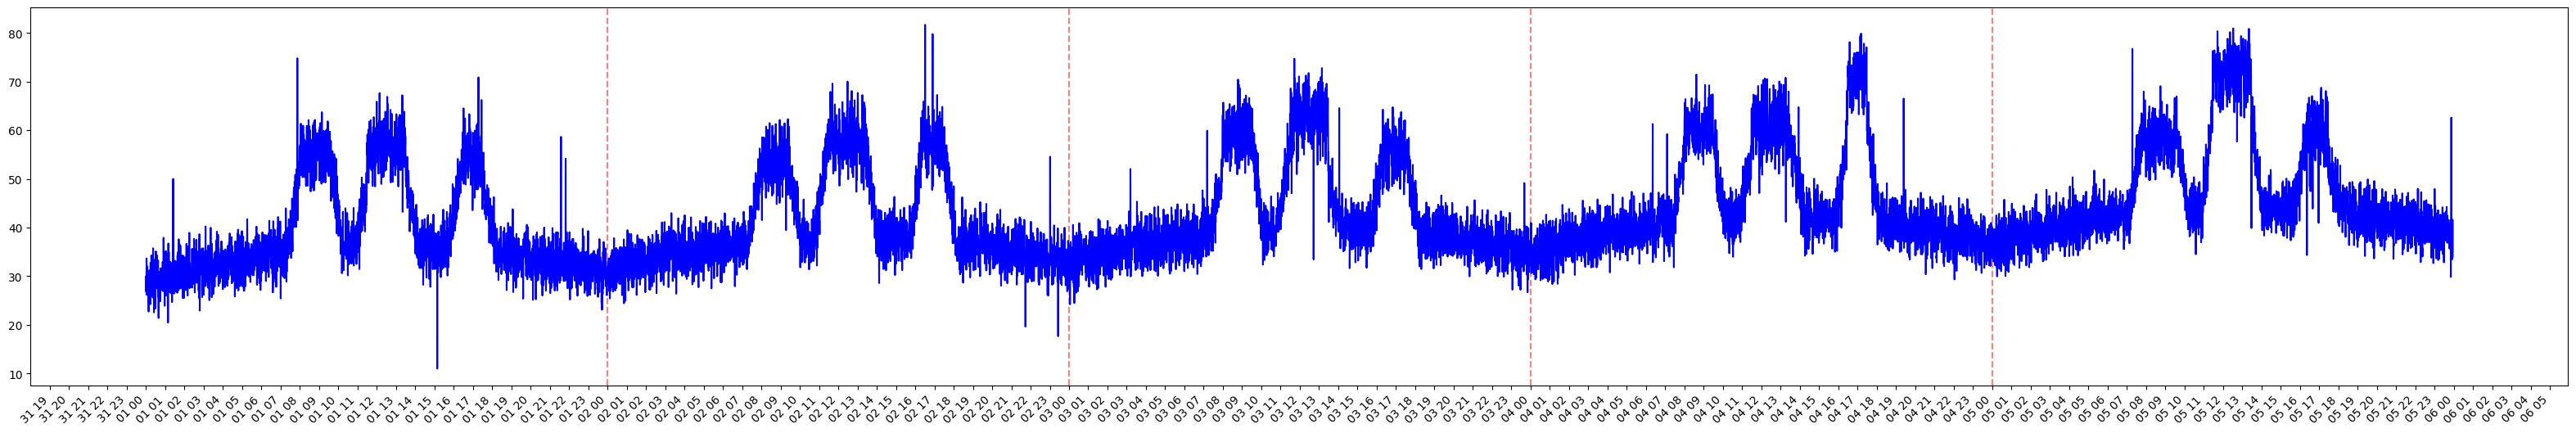

In [3]:
# - - -
# Plot the DataFrame and vertical lines to segment the days.
# - - -


import matplotlib.dates as mdates

# Adjust the Chart size and Xaxis format
fig = plt.figure(figsize=(40, 6), dpi=100)
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %H'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))

plt.axvline(df['ds'].iloc[2880], color='red', linestyle='--', alpha=0.5)
plt.axvline(df['ds'].iloc[2880*2], color='red', linestyle='--', alpha=0.5)
plt.axvline(df['ds'].iloc[2880*3], color='red', linestyle='--', alpha=0.5)
plt.axvline(df['ds'].iloc[2880*4], color='red', linestyle='--', alpha=0.5)

plt.plot(df['ds'],df['y'], color='blue')
plt.show()


In [4]:
m = NeuralProphet(daily_seasonality=True) #n_lags=10, quantiles=[0.05, 0.95],
m.set_plotting_backend("plotly")
metrics = m.fit(df, freq='30s')
#forecast = m.predict(df)

Finding best initial lr:   0%|          | 0/254 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 225it [00:00, ?it/s]

In [12]:
#m.highlight_nth_step_ahead_of_each_forecast(1).plot(forecast)

# Create a new dataframe reaching 365 into the future for our forecast, n_historic_predictions also shows historic data
df_future = m.make_future_dataframe(df, n_historic_predictions=True, periods=2880*2)

# Predict the future
f = m.predict(df_future)

# Visualize the forecast
f.head()

Predicting: 225it [00:00, ?it/s]

,ds,y,yhat1,trend,season_daily
20150,2023-01-07 23:55:00,NaN,42.791504,51.872116,-9.080612
20151,2023-01-07 23:55:30,NaN,42.823414,51.872711,-9.049297
20152,2023-01-07 23:56:00,NaN,42.855312,51.873306,-9.017994
20153,2023-01-07 23:56:30,NaN,42.887192,51.873905,-8.986711
20154,2023-01-07 23:57:00,NaN,42.919044,51.874500,-8.955454


                       ds   y      yhat1      trend  season_daily
20150 2023-01-07 23:55:00 NaN  42.791504  51.872116     -9.080612
20151 2023-01-07 23:55:30 NaN  42.823414  51.872711     -9.049297
20152 2023-01-07 23:56:00 NaN  42.855312  51.873306     -9.017994
20153 2023-01-07 23:56:30 NaN  42.887192  51.873905     -8.986711
20154 2023-01-07 23:57:00 NaN  42.919044  51.874500     -8.955454


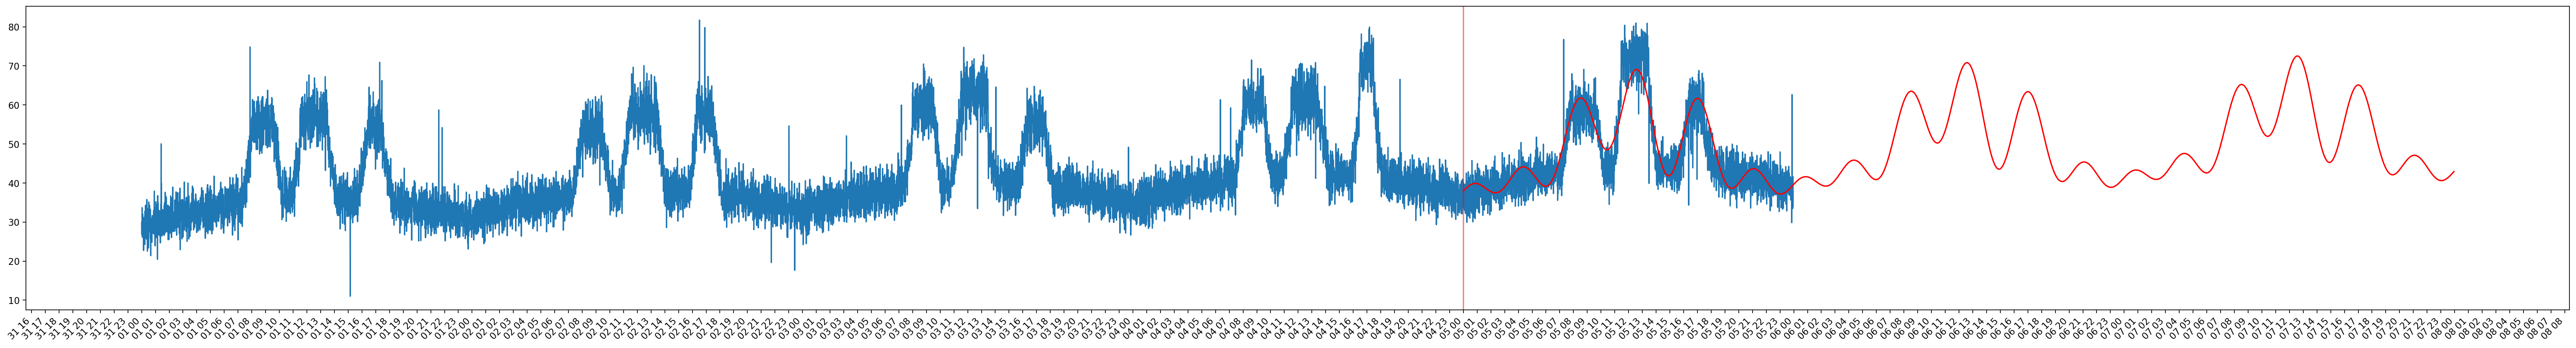

In [24]:
# - - -
# Plot entire data and the predictions
# - - -


import matplotlib.pyplot as plt 
import matplotlib.dates

print(f.tail())

period = 2880 * 4 # 2880 = 30s freq in 24h

# Adjust the Chart size and Xaxis format
plt.figure(figsize=(50, 6), dpi=200)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %H'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.xticks(rotation=45, ha='right')

plt.plot(df['ds'],df['y'])
plt.axvline(df['ds'].iloc[period], color='red', linestyle='-', alpha=0.5)

plt.plot(f['ds'][period:],f['yhat1'][period:], color="r")


plt.show()